In [1]:
#Import necessary programs
import os
import sys

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

import json
import csv

import os,glob

import statsmodels.api as sm

The data that is used in this model is from the free data source provided by StatsBomb
<img src = "stats-bomb-logo.png"/>

In [2]:
#Read through all json files in folder and combine them
myList = []
folder_path = r'C:\Users\Yuma\Desktop\Sport Analytics\StatsBomb Data\open-data-master\data\events'
for filename in glob.glob(os.path.join(folder_path,'*.json')):
    with open(filename,'r',encoding='utf-8') as f:
        myList += json.load(f)
print(len(myList))

1904058


In [3]:
#Only get shot data from json
shot_data = []
length = len(myList)
for i in range(length):
    if myList[i]["type"]["name"] == "Shot":
        shot_data.append(myList[i])

print(len(shot_data))

12826


In [4]:
print(shot_data[162])

{'id': '423171d3-ff73-400c-9ff6-669ccf35f2ac', 'index': 2507, 'period': 2, 'timestamp': '00:16:49.931', 'minute': 61, 'second': 49, 'type': {'id': 16, 'name': 'Shot'}, 'possession': 127, 'possession_team': {'id': 217, 'name': 'Barcelona'}, 'play_pattern': {'id': 4, 'name': 'From Throw In'}, 'team': {'id': 217, 'name': 'Barcelona'}, 'player': {'id': 5246, 'name': 'Luis Alberto Suárez Díaz'}, 'position': {'id': 23, 'name': 'Center Forward'}, 'location': [115.7, 39.3], 'duration': 1.335006, 'related_events': ['28820abd-b160-4729-b2f0-cf7bde32b8c0'], 'shot': {'open_goal': True, 'statsbomb_xg': 0.645913, 'end_location': [118.8, 39.7], 'first_time': True, 'outcome': {'id': 101, 'name': 'Wayward'}, 'type': {'id': 87, 'name': 'Open Play'}, 'body_part': {'id': 37, 'name': 'Head'}, 'technique': {'id': 95, 'name': 'Volley'}, 'freeze_frame': [{'location': [105.0, 40.9], 'player': {'id': 6396, 'name': 'Beñat Etxebarria Urkiaga'}, 'position': {'id': 15, 'name': 'Left Center Midfield'}, 'teammate': F

In [5]:
#Display elements of shot data
for i in range(len(shot_data)):
    print(shot_data[i]['shot']['statsbomb_xg'])

0.09547977
0.04792399
0.018476848
0.13795376
0.036229447
0.08145846
0.091406934
0.09444674
0.19424194
0.20816946
0.25097725
0.15425128
0.13852757
0.026312664
0.02289896
0.019046258
0.039850924
0.026051233
0.033997994
0.12613125
0.079218775
0.013615903
0.26918432
0.13953203
0.34191322
0.06292634
0.27567652
0.27103376
0.038172305
0.023506267
0.019367632
0.019701071
0.055583283
0.113150805
0.056758583
0.16270155
0.08814221
0.015573608
0.022829305
0.15381855
0.019949619
0.20946714
0.03747516
0.15972207
0.016128574
0.14662875
0.4155642
0.1203083
0.02169341
0.03029805
0.1015918
0.028402079
0.056003265
0.07627569
0.042654607
0.04128705
0.034770057
0.030285917
0.14184639
0.12749971
0.4594413
0.57215023
0.06685649
0.026419153
0.1257708
0.021824017
0.07741139
0.26660585
0.0468657
0.24203004
0.3879865
0.02886755
0.34475145
0.42384946
0.025973916
0.014212875
0.091666594
0.40701
0.05358443
0.12231804
0.76
0.06587295
0.038172934
0.04525756
0.13929716
0.06719286
0.040593408
0.075184904
0.2101679
0.04

In [6]:
new_shot_data = []
for i in range(len(shot_data)):
    #Get rid of PK shots because we already know PKs have a 0.76 xG
    if 'statsbomb_xg' in shot_data[i]['shot']:
        if not (shot_data[i]['shot'].get('statsbomb_xg') == 0.76):
            Dict = dict({'id': shot_data[i]['id'], 'play_pattern': shot_data[i]['play_pattern']['name'], 'location': 
                     shot_data[i]['location'], 'statsbomb_xg': shot_data[i]['shot']['statsbomb_xg'], 'end_location': 
                     shot_data[i]['shot']['end_location'], 'body_part': shot_data[i]['shot']['body_part']['name'], 
                     'technique': shot_data[i]['shot']['technique']['name'], 'outcome': 
                     shot_data[i]['shot']['outcome']['name'], 'under_pressure': False, 'first_time': False})
            if 'under_pressure' in shot_data[i].keys():
                Dict.update(under_pressure = shot_data[i]['under_pressure'])
            if 'first_time' in shot_data[i]['shot'].keys():
                Dict.update(first_time = shot_data[i]['shot']['first_time'])
            new_shot_data.append(Dict)
    
print(len(new_shot_data))

12610


In [7]:
print(new_shot_data[174])

{'id': 'ceec9e87-df47-4b25-a784-3b4b41606599', 'play_pattern': 'From Corner', 'location': [119.1, 42.6], 'statsbomb_xg': 0.90241957, 'end_location': [120.0, 42.9, 0.1], 'body_part': 'Right Foot', 'technique': 'Normal', 'outcome': 'Goal', 'under_pressure': False, 'first_time': True}


In [8]:
for i in range(len(new_shot_data)):
    print(new_shot_data[i]['location'])
#print(new_shot_data[130]['location'])

[111.7, 51.7]
[114.0, 27.0]
[92.0, 34.5]
[109.1, 38.7]
[107.0, 25.0]
[108.1, 27.4]
[112.0, 43.7]
[97.0, 54.0]
[112.3, 41.4]
[102.5, 29.2]
[109.3, 29.7]
[106.5, 33.5]
[116.9, 31.2]
[106.0, 23.0]
[111.1, 24.1]
[94.4, 24.5]
[107.4, 25.9]
[100.1, 58.1]
[100.2, 27.7]
[96.1, 45.1]
[106.1, 47.1]
[88.7, 42.8]
[109.1, 30.1]
[113.4, 33.5]
[113.4, 31.1]
[105.1, 31.1]
[106.1, 46.1]
[112.0, 34.6]
[119.2, 27.0]
[105.4, 22.5]
[89.1, 50.9]
[92.1, 28.7]
[98.2, 34.4]
[113.0, 31.4]
[101.1, 29.1]
[110.0, 51.6]
[94.2, 38.0]
[104.6, 20.6]
[108.6, 21.9]
[112.7, 48.6]
[95.6, 29.3]
[112.5, 41.2]
[108.8, 34.7]
[106.6, 28.0]
[91.4, 52.8]
[113.6, 35.2]
[116.9, 37.3]
[110.8, 51.3]
[89.3, 48.2]
[103.3, 58.3]
[111.9, 35.5]
[94.7, 35.6]
[96.3, 39.6]
[117.1, 51.5]
[103.9, 51.7]
[101.9, 36.6]
[89.1, 46.9]
[112.0, 54.9]
[118.5, 34.7]
[116.9, 32.5]
[114.3, 35.3]
[115.9, 42.8]
[112.9, 28.4]
[94.2, 43.4]
[117.6, 49.2]
[89.6, 33.1]
[108.8, 28.5]
[112.6, 28.0]
[109.7, 57.5]
[110.9, 45.6]
[107.1, 35.1]
[96.6, 33.3]
[114.4, 38

In [9]:
print(new_shot_data[0]['location'])

[111.7, 51.7]


In [10]:
#Calculate 'distance' data from 'location' data
distance = []
goal = [120,40]
for i in range(len(new_shot_data)):
    point = new_shot_data[i]['location']
    calculation = math.sqrt(((point[0]-goal[0])**2) + ((point[1]-goal[1])**2))
    distance.append(calculation)

print(distance[10000])

11.36353818139403


In [11]:
#Calculate 'angle' data from 'location' data
angle = []
pen_vect_pt = [12,0]
for i in range(len(new_shot_data)):
    shot_vector = [120-new_shot_data[i]['location'][0],abs(40-new_shot_data[i]['location'][1])]
    unit_vector_1 = pen_vect_pt / np.linalg.norm(pen_vect_pt)
    unit_vector_2 = shot_vector / np.linalg.norm(shot_vector)
    dot_product = np.dot(unit_vector_1, unit_vector_2)
    current_angle = math.degrees(np.arccos(dot_product))
    angle.append(current_angle)

print(angle)

[54.64804531609818, 65.22485943116808, 11.113040535948294, 6.801314823981564, 49.08561677997488, 46.63657704161671, 24.820541335489118, 31.328692867804165, 10.304846468766009, 31.680513712958646, 43.9087837747374, 25.709953780811272, 70.59402924599885, 50.527540151656176, 60.76214776397254, 31.193595102442714, 48.21548399174822, 42.28801653255506, 31.84905131905529, 12.045632385265794, 27.057552910841316, 5.111893990013171, 42.247514599731296, 44.56263613247929, 53.44036527550666, 30.85052391365481, 23.694216382171234, 34.01934998982646, 86.47854662307778, 50.16224027094536, 19.430335187247493, 22.048829574925662, 14.406685156436867, 50.85601358542897, 29.97289058597137, 49.236394799058836, 4.43266846868991, 51.556946498163384, 57.79587107933758, 49.67416371113079, 23.678632633213386, 9.090276920822351, 25.324181401947186, 41.84515713520801, 24.11101950255092, 36.86989764584398, 41.05481377096251, 50.84892164592895, 14.954646765153033, 47.617413363264426, 29.054604099077164, 9.86580694

In [12]:
#Create a different json for the linear regression model
# 0 means false, 1 meeans true
new_shot_data_2 = []
for i in range(len(new_shot_data)):
    Dict_2 = dict({'id': new_shot_data[i]['id'] , 'location': new_shot_data[i]['location'], 'distance': distance[i], 
                   'angle': angle[i], 'isFoot': 0, 'isHead': 0, 'isVolley': 0, 'isNormalShot': 0, 'isLobShot': 0, 
                   'isCorner': 0, 'isRegularPlay': 0, 'isFreeKick': 0, 'isThrowIn': 0, 'isCounter': 0, 'fromKeeper': 0, 
                   'fromGK': 0, 'first_time': 0, 'under_pressure': 0, 'isGoal': 0, 
                   'statsbomb_xg': new_shot_data[i]['statsbomb_xg']})
    
    if new_shot_data[i]['body_part'] == 'Right Foot':
        Dict_2.update(isFoot = 1)
    elif new_shot_data[i]['body_part'] == 'Left Foot':
        Dict_2.update(isFoot = 1)
    else:
        Dict_2.update(isFoot = 0)
        
    if new_shot_data[i]['body_part'] == 'Head':
        Dict_2.update(isHead = 1)
    else:
        Dict_2.update(isHead = 0)
        
    if new_shot_data[i]['technique'] == 'Half Volley':
        Dict_2.update(isVolley = 1)
    elif new_shot_data[i]['technique'] == 'Volley':
        Dict_2.update(isVolley = 1)
    else:
        Dict_2.update(isVolley = 0)
        
    if new_shot_data[i]['technique'] == 'Normal':
        Dict_2.update(isNormalShot = 1)
    else:
        Dict_2.update(isNormalShot = 0)
        
    if new_shot_data[i]['technique'] == 'Lob':
        Dict_2.update(isLobShot = 1)
    else:
        Dict_2.update(isLobShot = 0)
        
    if new_shot_data[i]['play_pattern'] == 'From Corner':
        Dict_2.update(isCorner = 1)
    else:
        Dict_2.update(isCorner = 0)
        
    if new_shot_data[i]['play_pattern'] == 'Regular Play':
        Dict_2.update(isRegularPlay = 1)
        
    if new_shot_data[i]['play_pattern'] == 'From Free Kick':
        Dict_2.update(isFreeKick = 1)
    else:
        Dict_2.update(isFreeKick = 0)
        
    if new_shot_data[i]['play_pattern'] == 'From Throw In':
        Dict_2.update(isThrowIn = 1)
    else:
        Dict_2.update(isThrowIn = 0)
        
    if new_shot_data[i]['play_pattern'] == 'From Counter':
        Dict_2.update(isCounter = 1)
    else:
        Dict_2.update(isCounter = 0)
        
    if new_shot_data[i]['play_pattern'] == 'From Keeper':
        Dict_2.update(fromKeeper = 1)
    else:
        Dict_2.update(fromKeeper = 0)
    
    if new_shot_data[i]['play_pattern'] == 'From Goal Kick':
        Dict_2.update(fromGK = 1)
    else:
        Dict_2.update(fromGK = 0)
        
    if new_shot_data[i]['under_pressure'] == True:
        Dict_2.update(under_pressure = 1)
    else:
        Dict_2.update(under_pressure = 0)
        
    if new_shot_data[i]['first_time'] == True:
        Dict_2.update(first_time = 1)
    else:
        Dict_2.update(first_time = 0)
        
    if new_shot_data[i]['outcome'] == 'Goal':
        Dict_2.update(isGoal = 1)
    else:
        Dict_2.update(isGoal = 0)
        
    new_shot_data_2.append(Dict_2)
    

print(new_shot_data_2[10000])

{'id': 'dbf2d5a1-1817-4fb4-8a79-381e9de3bac0', 'location': [108.7, 38.8], 'distance': 11.36353818139403, 'angle': 6.061788788728689, 'isFoot': 1, 'isHead': 0, 'isVolley': 0, 'isNormalShot': 1, 'isLobShot': 0, 'isCorner': 0, 'isRegularPlay': 0, 'isFreeKick': 0, 'isThrowIn': 1, 'isCounter': 0, 'fromKeeper': 0, 'fromGK': 0, 'first_time': 0, 'under_pressure': 1, 'isGoal': 0, 'statsbomb_xg': 0.14499828}


In [13]:
#Save data as a csv file so we don't have to parse through original data over and over again
headers = ['id', 'location', 'distance', 'angle', 'isFoot', 'isHead', 'isVolley', 'isNormalShot', 'isLobShot', 'isCorner', 
           'isRegularPlay', 'isFreeKick', 'isThrowIn', 'isCounter', 'fromKeeper', 'fromGK', 'first_time', 'under_pressure', 
          'isGoal', 'statsbomb_xg']

filename = "shot_data.csv"

with open(filename, 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = headers)
    writer.writeheader()
    writer.writerows(new_shot_data_2)

In [14]:
#Read json through pandas dataframe
df = pd.DataFrame(new_shot_data_2, columns=['id','location','distance', 'angle','isFoot','isHead','isVolley','isNormalShot', 
                                            'isLobShot', 'isCorner','isRegularPlay','isFreeKick','isThrowIn','isCounter',
                                            'fromKeeper', 'fromGK','first_time','under_pressure','isGoal','statsbomb_xg'])
print(df)

                                         id       location   distance  \
0      65f16e50-7c5d-4293-b2fc-d20887a772f9  [111.7, 51.7]  14.345034   
1      b0f73423-3990-45ae-9dda-3512c2d1aff3  [114.0, 27.0]  14.317821   
2      13b1ddab-d22e-43d9-bfe4-12632fea1a27   [92.0, 34.5]  28.535066   
3      391bfb74-07a6-4afe-9568-02a9b23f5bd4  [109.1, 38.7]  10.977249   
4      5e55f5a5-954f-4cc4-ba6e-a9cf6d6e249e  [107.0, 25.0]  19.849433   
...                                     ...            ...        ...   
12605  c0090be3-7f39-4653-b535-dbaa01b5639a  [100.5, 39.8]  19.501026   
12606  786c2e5c-7a14-407c-81cb-16bf3e4ec34b   [91.8, 53.6]  31.308146   
12607  31b998c0-f889-43ee-a215-0f1e1273c76b  [103.1, 47.2]  18.369812   
12608  a586c569-474f-4c70-a7de-0364824de189  [104.8, 51.7]  19.181502   
12609  b642d77d-582e-4ebb-849e-44202b65df1a  [106.9, 60.1]  23.992082   

           angle  isFoot  isHead  isVolley  isNormalShot  isLobShot  isCorner  \
0      54.648045       1       0         1

In [15]:
#Eliminate duplicate data
df.drop_duplicates(subset = 'id', keep = False, inplace = True)
print(len(df))

12610


In [16]:
print(df[['isFoot', 'isVolley']])

       isFoot  isVolley
0           1         1
1           1         1
2           1         0
3           0         0
4           1         0
...       ...       ...
12605       1         1
12606       1         0
12607       1         0
12608       1         0
12609       1         1

[12610 rows x 2 columns]


In [17]:
#Logistic Regression Calculation
#Got rid of 'isNormalShot', 'isCounter', 'fromKeeper', 'fromGK' because the p-value was too high
x = df[['distance', 'angle', 'isHead', 'isVolley', 'isLobShot', 'isNormalShot', 'isFreeKick', 'isCorner', 
        'under_pressure', 'first_time']]
y = df['isGoal']

model = sm.Logit(y,x).fit()
predictions = model.predict(x)
print(model.summary2())

Optimization terminated successfully.
         Current function value: 0.310837
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.163    
Dependent Variable: isGoal           AIC:              7859.3028
Date:               2020-09-02 12:13 BIC:              7933.7252
No. Observations:   12610            Log-Likelihood:   -3919.7  
Df Model:           9                LL-Null:          -4682.0  
Df Residuals:       12600            LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
distance        -0.1640   0.0052 -31.4653 0.0000 -0.1742 -0.1538
angle           -0.0129   0.0015  -8.7771 0.0000 -0.0158 -0.0100
isHead       

The next two sets of code are taken from Peter McKeever's Expected Goals Model program. It can be found here: http://petermckeever.com/2019/01/building-an-expected-goals-model-in-python/

In [18]:
#Split and randomise our data into training and testing sets and see how accurate the model is on the test data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

log_r = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 52)

log_r.fit(x_train, y_train)
print("Log Regression test set accuracy {:.3f}".format(log_r.score(x_test,y_test)))

Log Regression test set accuracy 0.889


C:\Users\Yuma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
prediction = log_r.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[3319   31]
 [ 390   43]]


The below program comes from Susan Li's article on "Building A Logistic Regression in Python, Step by Step" and can be found here: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

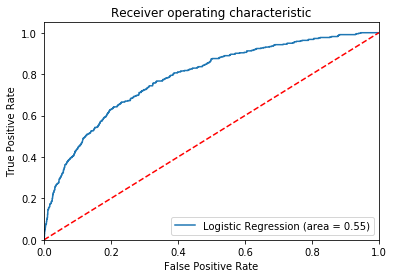

In [20]:
#Draw a ROC curve to better understand our logistic regression model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, log_r.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, log_r.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [21]:
#Output of xG values
xg_model = log_r.predict_proba(x)
for i in range(len(xg_model)):
    print(xg_model[i][1])

0.08864628683535408
0.07796117811561555
0.031601262486231935
0.11403332128112793
0.04928633927944569
0.05157740183906458
0.08344223721832308
0.04027812129095747
0.21176396519841614
0.0917468312941906
0.34857576322202866
0.22800095991271843
0.25923561161570413
0.02313148688439111
0.08390507218149527
0.019305773200561246
0.0958620826659622
0.014317567488569797
0.0600772795850543
0.07624377963768247
0.18300233229764368
0.010199108149062
0.18720048847408685
0.2519281224844008
0.24866980019741636
0.13730539484663595
0.24638958832699995
0.3535969161457986
0.13239044580231352
0.05144214612192703
0.01423062280474399
0.021210691478443396
0.0651746451523763
0.27232748873985085
0.0504112889891371
0.15951762141806838
0.06728390654092581
0.033870392891349875
0.06820686811851402
0.18349405618761813
0.023222961616561153
0.21000973415774257
0.05726962583357153
0.10977605429727116
0.016883256523714262
0.14531788238642493
0.37785191828986486
0.13645225219414034
0.01776454970429104
0.035648003497261535
0

Below is where you can apply the expected goals model to new datasets.

In [22]:
#Import dataset and calculate distance and angle
test_df = pd.read_csv(r'C:\Users\Yuma\Desktop\Sport Analytics\xG_Model_Data.csv')
distance = []
goal = [120,40]
for i in range(len(test_df)):
    point_x = test_df.loc[i]['x_location']
    point_y = test_df.loc[i]['y_location']
    calculation = math.sqrt((point_x-goal[0])**2) + ((point_y-goal[1])**2)
    distance.append(calculation)
    
angle = []
pen_vect_pt = [12,0]
for i in range(len(test_df)):
    shot_vector = [120-test_df.loc[i]['x_location'],abs(40-test_df.loc[i]['y_location'])]
    unit_vector_1 = pen_vect_pt / np.linalg.norm(pen_vect_pt)
    unit_vector_2 = shot_vector / np.linalg.norm(shot_vector)
    dot_product = np.dot(unit_vector_1, unit_vector_2)
    current_angle = math.degrees(np.arccos(dot_product))
    angle.append(current_angle)

test_df['distance'] = distance
test_df['angle'] = angle
print(test_df)

   x_location  y_location  isHead  isVolley  isLobShot  isNormalShot  \
0       114.0        40.0       0         1          0             0   

   isFreeKick  isCorner  under_pressure  first_time  distance  angle  
0           0         0               0           0       6.0    0.0  


In [23]:
test_x = test_df[['distance', 'angle', 'isHead', 'isVolley', 'isLobShot', 'isNormalShot', 'isFreeKick', 'isCorner', 
        'under_pressure', 'first_time']]
test_xG = log_r.predict_proba(test_x)
print("The probability that the shot is a goal is: ")
print(test_xG[0][1])

The probability that the shot is a goal is: 
0.4285524750325052
